In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# Data import

In [2]:
chunk_size = 100000
sample_size_percent = 5

data = pd.DataFrame()

for chunk in pd.read_csv("./datas/en.openfoodfacts.org.products.csv", sep="\t", nrows=None, chunksize=chunk_size):
    actual_chunk_size = chunk.shape[0]
    random_size = int(actual_chunk_size * (sample_size_percent / 100))
    random_indexes = np.random.default_rng().choice(chunk.index, size=random_size, replace=False)
    chunk = chunk.loc[random_indexes]
    data = pd.concat([data, chunk])
    del chunk

data.shape

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,22,23,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self

(95978, 186)

## Dataset overview

In [3]:
rows_nb, cols_nb = data.shape

In [4]:
data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
16578,0011225113215,http://world-en.openfoodfacts.org/product/0011...,org-database-usda,1587640235,2020-04-23T11:10:35Z,1587640236,2020-04-23T11:10:36Z,"Sweet p's bake shop, cheese danish coffee cake",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Biscuits and cakes, Cakes","en:biscuits-and-cakes,en:cakes","Biscuits and cakes,Cakes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Enriched flour (wheat flour, malted barley flo...","en:eggs,en:gluten,en:milk",NaN,NaN,NaN,NaN,0.125 DANISH (50 g),50.0,NaN,19.0,NaN,"en:e1400,en:e150c,en:e1510,en:e1518,en:e1520,e...","E1400 - Dextrin,E150c - Ammonia caramel,E1510 ...",0.0,NaN,NaN,1.0,NaN,e160a-beta-carotene,20.0,e,4.0,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutri

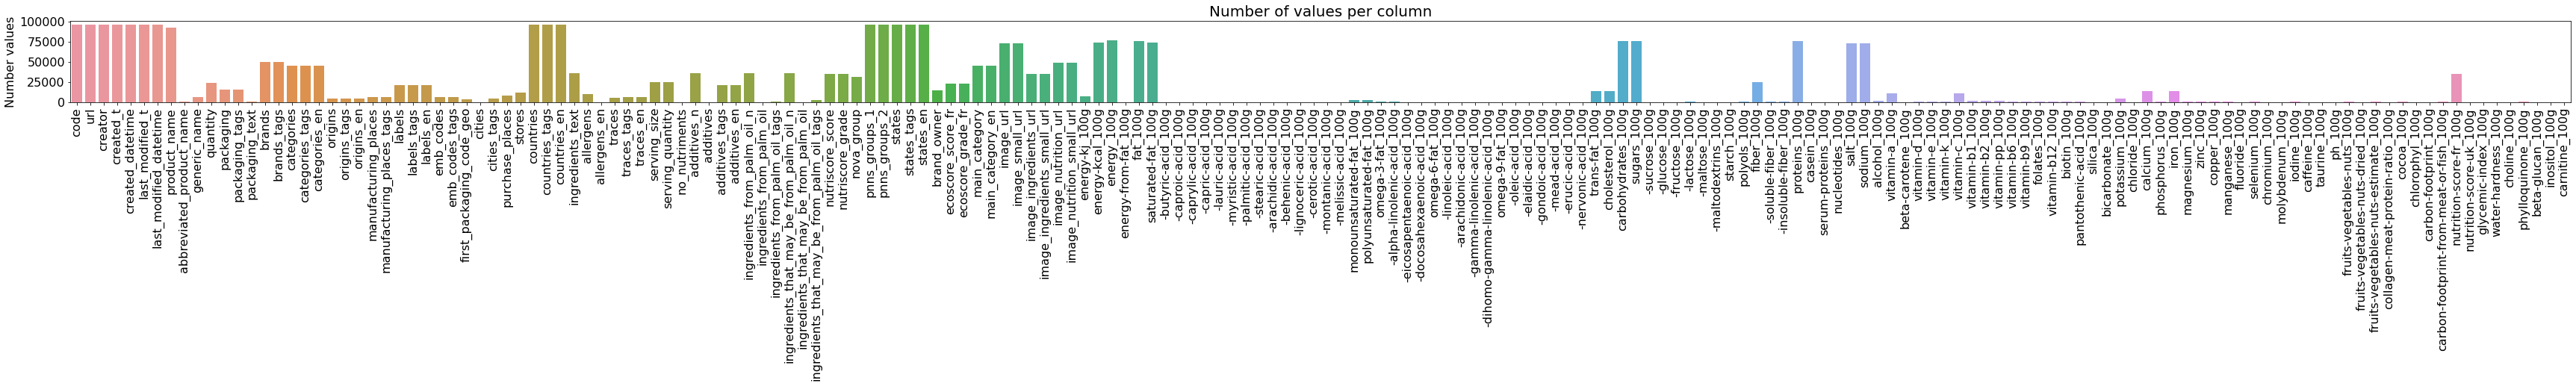

In [5]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=90, size=16)
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

## Feature list

In [50]:
features = []

## Feature study

In [28]:
data.nova_group.head()

16578    4.0
11791    1.0
45649    3.0
12291    3.0
73799    4.0
Name: nova_group, dtype: float64

In [29]:
data.pnns_groups_1.head()

16578            Sugary snacks
11791    Fruits and vegetables
45649     Cereals and potatoes
12291    Fruits and vegetables
73799           Fish Meat Eggs
Name: pnns_groups_1, dtype: object

In [30]:
data.pnns_groups_2.head()

16578    Biscuits and cakes
11791            Vegetables
45649               Cereals
12291          Dried fruits
73799      Fish and seafood
Name: pnns_groups_2, dtype: object

In [31]:
data.states.head()

16578    en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded
11791          en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded
45649    en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-b

In [32]:
data.states_tags.head()

16578    en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded
11791          en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded
45649    en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-com

In [33]:
data.states_en.head()

16578    To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be uploaded
11791          To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories completed,Brands completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be uploaded
45649    To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be uploaded
12291          To be completed,Nutrition facts completed,Ingredients complet

In [34]:
data.main_category.head()

16578                         en:cakes
11791                      en:tomatoes
45649    en:cereals-and-their-products
12291             en:dried-cranberries
73799                en:frozen-seafood
Name: main_category, dtype: object

In [35]:
data.main_category_en.head()

16578                         Cakes
11791                      Tomatoes
45649    Cereals and their products
12291             Dried cranberries
73799                Frozen seafood
Name: main_category_en, dtype: object

In [36]:
data.serving_size.head()

16578      0.125 DANISH (50 g)
11791          0.5 cup (121 g)
45649    4 bites (30 g) (30 g)
12291          0.33 cup (40 g)
73799         1 FILLET (148 g)
Name: serving_size, dtype: object

In [37]:
data.serving_quantity.head()

16578     50.0
11791    121.0
45649     30.0
12291     40.0
73799    148.0
Name: serving_quantity, dtype: float64

In [45]:
data.additives_n.head()

16578    19.0
11791     1.0
45649     0.0
12291     0.0
73799     4.0
Name: additives_n, dtype: float64

In [46]:
data.additives_tags.head()

16578    en:e1400,en:e150c,en:e1510,en:e1518,en:e1520,en:e270,en:e322,en:e322i,en:e341,en:e341i,en:e406,en:e410,en:e414,en:e415,en:e435,en:e450,en:e450i,en:e471,en:e481,en:e500,en:e500ii,en:e517,en:e554
11791                                                                                                                                                                                              en:e330
45649                                                                                                                                                                                                  NaN
12291                                                                                                                                                                                                  NaN
73799                                                                                                                                                           en:e150c,en:e330,en:e415,en:

In [47]:
data.additives_en.head()

16578    E1400 - Dextrin,E150c - Ammonia caramel,E1510 - Ethanol,E1518 - Glyceryl triacetate,E1520 - Propylene Glycol,E270 - Lactic acid,E322 - Lecithins,E322i - Lecithin,E341 - Calcium phosphates,E341i - Monocalcium phosphate,E406 - Agar,E410 - Locust bean gum,E414 - Acacia gum,E415 - Xanthan gum,E435 - Polyoxyethylene sorbitan monostearate,E450 - Diphosphates,E450i - Disodium diphosphate,E471 - Mono- and diglycerides of fatty acids,E481 - Sodium stearoyl-2-lactylate,E500 - Sodium carbonates,E500ii - Sodium hydrogen carbonate,E517 - Ammonium sulphate,E554 - Sodium aluminium silicate
11791                                                                                                                                                                                                                                                                                                                                                                                                                    

***
# Nutriscore

## Nutriscore feature analysis

In [6]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [7]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
16578,20.0,e,20.0
11791,-5.0,a,-5.0
45649,18.0,d,18.0
12291,4.0,c,4.0
73799,-2.0,a,-2.0
46123,22.0,e,22.0
83428,NaN,NaN,NaN
13673,14.0,d,14.0
34711,15.0,d,15.0
86521,17.0,d,17.0


In [8]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

at least one value:  35256
nutriscore_grade recorded:  35256
all rows:  95978


We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [54]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [10]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [11]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [12]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

14


['fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'sugars_100g',
 'sodium_100g']

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [13]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

16578    Enriched flour (wheat flour, malted barley flour, niacin, reduced iron, thiamine mononitrate, riboflavin, folic acid), water, sugar, margarine (palm oil, water, soybean oil, sugar, soy lecithin, mono - & diglycerides, potassium sorbate preservative, citric acid preservative, artificial flavor, beta-carotene color, vitamin a palmitate), wheat flour, margarine (soybean oil & palm oil, water, salt, mono - & diglycerides, soy lecithin, sodium benzoate preservative, artificial flavor, vitamin a palmitate, beta-carotene color), high fructose corn syrup, dextrose, milk, neufchatel cheese (pasteurized milk & cream, cheese culture, salt, carob bean gum), contains less than 2 % of each of the following: yeast, vegetable shortening (palm oil, fractionated palm oil), eggs, food starch-modified, whey, skim milk, salt, defatted soy flour, egg yolks, palm oil, mono - & diglycerides, corn starch, distilled monoglycerides, dextrin, egg whites, vegetable shortening (palm oil, fractionated palm 

In [14]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

row[col]:  Enriched flour (wheat flour, malted barley flour, niacin, reduced iron, thiamine mononitrate, riboflavin, folic acid), water, sugar, margarine (palm oil, water, soybean oil, sugar, soy lecithin, mono - & diglycerides, potassium sorbate preservative, citric acid preservative, artificial flavor, beta-carotene color, vitamin a palmitate), wheat flour, margarine (soybean oil & palm oil, water, salt, mono - & diglycerides, soy lecithin, sodium benzoate preservative, artificial flavor, vitamin a palmitate, beta-carotene color), high fructose corn syrup, dextrose, milk, neufchatel cheese (pasteurized milk & cream, cheese culture, salt, carob bean gum), contains less than 2 % of each of the following: yeast, vegetable shortening (palm oil, fractionated palm oil), eggs, food starch-modified, whey, skim milk, salt, defatted soy flour, egg yolks, palm oil, mono - & diglycerides, corn starch, distilled monoglycerides, dextrin, egg whites, vegetable shortening (palm oil, fractionated pal

16578    None
11791    None
45649    None
12291    None
73799    None
46123    None
83428    None
13673    None
34711    None
86521    None
dtype: object

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.

***
# Countries

In [20]:
data.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
16578,United States,en:united-states,United States
11791,United States,en:united-states,United States
45649,United States,en:united-states,United States
12291,United States,en:united-states,United States
73799,United States,en:united-states,United States
46123,United States,en:united-states,United States
83428,en:Saint Pierre and Miquelon,en:saint-pierre-and-miquelon,Saint Pierre and Miquelon
13673,United States,en:united-states,United States
34711,United States,en:united-states,United States
86521,"en:spain, United States","en:spain,en:united-states","Spain,United States"


In [21]:
fill_infos(data, "countries_en")

countries_en total rows:  95674
countries_en filled count:  95370
countries_en filled percentage:  3.147171052631579


## Conclusion
The three features are completely filled and redundant. We can then keep only one of them, the 'countries_en' feature.

In [53]:
features += "countries_en"

***
# Cleaning

In [22]:
features = [
    "code",
    "url",
    "product_name",
    "abbreviated_product_name",
    "generic_name",
    "brands",
    "brands_tags",
    "origins",
    "origins_tags",
    "origins_en",
    "manufacturing_places",
    "manufacturing_places_tags",
    "cities",
    "cities_tags",
    "purchase_places",
    "countries",
    "countries_tags",
    "countries_en",
    "nutriscore_score",
    "nutriscore_grade",
    "brand_owner",
    "ecoscore_score_fr",
    "ecoscore_grade_fr",
    "image_url",
    "image_small_url",
    ]